In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing Raw Files
train_raw = pd.read_csv('/content/drive/MyDrive/Colab Database/Food Demand Forecasting/train.csv')
test_raw = pd.read_csv('/content/drive/MyDrive/Colab Database/Food Demand Forecasting/test.csv')
meal = pd.read_csv('/content/drive/MyDrive/Colab Database/Food Demand Forecasting/meal_info.csv')
centerinfo = pd.read_csv('/content/drive/MyDrive/Colab Database/Food Demand Forecasting/fulfilment_center_info.csv')

In [7]:
# Analyzing Data
print("The Shape of Demand dataset :", train_raw.shape)
print("The Shape of Fulfillment Center Information dataset :", centerinfo.shape)
print("The Shape of Meal information dataset :", meal.shape)
print("The Shape of Test dataset :", test_raw.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulfillment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)
The Shape of Test dataset : (32573, 8)


In [ ]:
# Check for missing values
train_raw.isnull().sum().sum()
test_raw.isnull().sum().sum()

In [9]:
# Analysis report
print("The company  has", centerinfo["center_id"].nunique(), " warehouse ", "spreed into  ",
      centerinfo["city_code"].nunique(), "City and ", centerinfo["region_code"].nunique(), "Regions")
print("The products of the company are ", meal["meal_id"].nunique(), "unique meals , divided into  ",
      meal["category"].nunique(), "category and ", meal["cuisine"].nunique(), "cuisine")

The company  has 77  warehouse  spreed into   51 City and  8 Regions
The products of the company are  51 unique meals , divided into   14 category and  4 cuisine


In [10]:
# Merge meal,center-info data with train and test data
train = pd.merge(train_raw, meal, on="meal_id", how="left")
train = pd.merge(train, centerinfo, on="center_id", how="left")
print("Shape of train data : ", train.shape)
train.head()

Shape of train data :  (456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [11]:
# Merge meal,center-info data with train and test data
train = pd.merge(train_raw, meal, on="meal_id", how="left")
train = pd.merge(train, centerinfo, on="center_id", how="left")
print("Shape of train data : ", train.shape)
train.head()

Shape of train data :  (456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [14]:
# Merge test data with meal and center info
test = pd.merge(test_raw, meal, on="meal_id", how="outer")
test = pd.merge(test, centerinfo, on="center_id", how="outer")
print("Shape of test data : ", test.shape)
test.head()

Shape of test data :  (32573, 14)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [15]:
# Typecasting to assign appropriate data type to variables
col_names = ['center_id', 'meal_id', 'category', 'cuisine', 'city_code', 'region_code', 'center_type']
train[col_names] = train[col_names].astype('category')
test[col_names] = test[col_names].astype('category')
print("Train Datatype\n", train.dtypes)
print("Test Datatype\n", test.dtypes)

Train Datatype
 id                          int64
week                        int64
center_id                category
meal_id                  category
checkout_price            float64
base_price                float64
emailer_for_promotion       int64
homepage_featured           int64
num_orders                  int64
category                 category
cuisine                  category
city_code                category
region_code              category
center_type              category
op_area                   float64
dtype: object
Test Datatype
 id                          int64
week                        int64
center_id                category
meal_id                  category
checkout_price            float64
base_price                float64
emailer_for_promotion       int64
homepage_featured           int64
category                 category
cuisine                  category
city_code                category
region_code              category
center_type              category
op_

In [16]:
# Orders by centers
center_orders = train.groupby("center_id", as_index=False).sum()
center_orders = center_orders[["center_id", "num_orders"]].sort_values(by="num_orders", ascending=False).head(10)
fig = px.bar(x=center_orders["center_id"].astype("str"), y=center_orders["num_orders"], title="Top 10 Centers by Order",
             labels={"x": "center_id", "y": "num_orders"})
fig.show()

In [17]:
# Pie chart on food category
fig = px.pie(values=train["category"].value_counts(), names=train["category"].unique(),
             title="Most popular food category")
fig.show()

In [18]:
# Orders by Cuisine types
cuisine_orders = train.groupby(["cuisine"], as_index=False).sum()
cuisine_orders = cuisine_orders[["cuisine", "num_orders"]].sort_values(by="num_orders", ascending=False)
fig = px.bar(cuisine_orders, x="cuisine", y="num_orders", title="orders by cuisine")
fig.show()

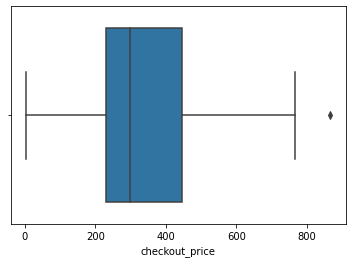

In [19]:
# Impact of check-out price on order
train_sample = train.sample(frac=0.2)
fig = px.scatter(train_sample, x="checkout_price", y="num_orders", title="number of order change with checkout price")
fig.show()
sns.boxplot(train["checkout_price"])

In [20]:
# Orders weekly trend
week_orders = train.groupby(["week"], as_index=False).sum()
week_orders = week_orders[["week", "num_orders"]]
fig = px.line(week_orders, x="week", y="num_orders", markers=True, title="Order weekly trend")
fig.show()

In [21]:
# Deriving discount percent and discount y/n
train['discount percent'] = ((train['base_price'] - train['checkout_price']) / train['base_price']) * 100

In [22]:
# Discount Y/N
train['discount y/n'] = [1 if x > 0 else 0 for x in (train['base_price'] - train['checkout_price'])]

In [23]:
# Creating same feature in test dataset
test['discount percent'] = ((test['base_price'] - test['checkout_price']) / test['base_price']) * 100
test['discount y/n'] = [1 if x > 0 else 0 for x in (test['base_price'] - test['checkout_price'])]
train.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount percent,discount y/n
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,10.151684,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,-0.736214,0


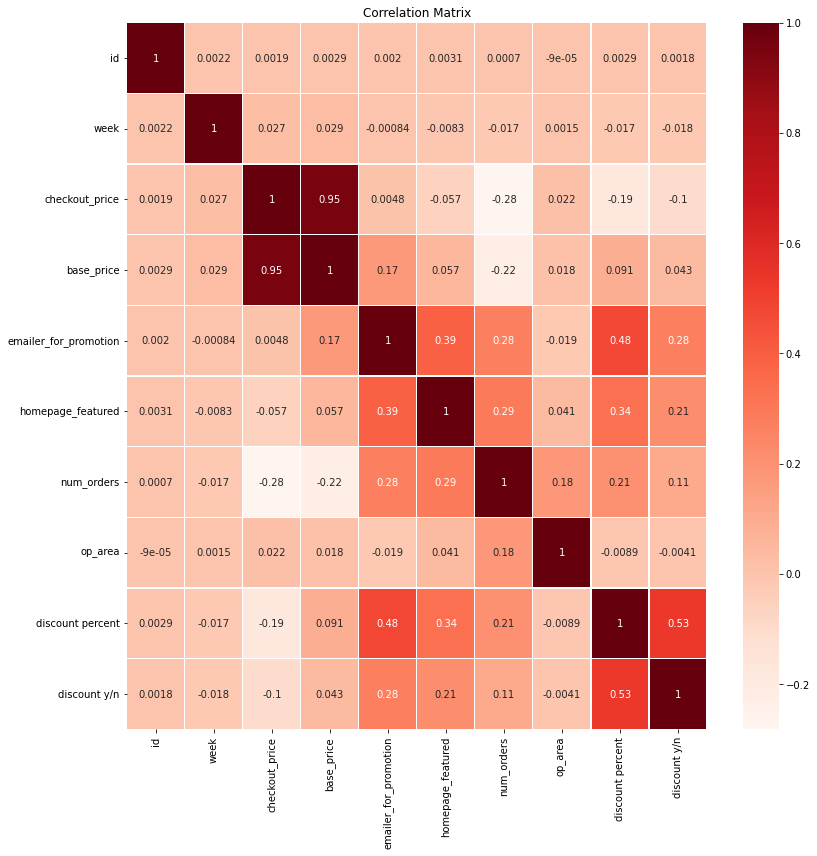

In [24]:
# Check for correlation between numeric features
plt.figure(figsize=(13, 13))
sns.heatmap(train.corr(), linewidths=.1, cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Define One hot encoding function
def one_hot_encode(features_to_encode, dataset):
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(dataset[features_to_encode])
    encoded_cols = pd.DataFrame(encoder.transform(dataset[features_to_encode]), columns=encoder.get_feature_names())
    dataset = dataset.drop(columns=features_to_encode)
    for cols in encoded_cols.columns:
        dataset[cols] = encoded_cols[cols]
    return dataset

In [26]:
# get list of categorical variables in data set
ls = train.select_dtypes(include='category').columns.values.tolist()

In [27]:
# Run one-hot encoding on all categorical variables
features_to_encode = ls
data = one_hot_encode(features_to_encode, train)
data = data.reset_index(drop=True)